In [9]:
import sys
sys.path.append("../..") 

In [10]:
import glob,os
import pandas as pd
import matplotlib.pyplot as plt
import torch
import seaborn as sns

In [11]:
def get_metrics_from_folder(path):
    df_tests = []
    for folder in os.listdir(path):
        if folder.startswith('version') == True:
            pathm = os.path.join(path, folder, "metrics.csv")
            pathp = os.path.join(path, folder, "predictions_0.csv")
            # model name:
            #checkpoint = torch.load(chk_path)
            predictions = pd.read_csv(pathp,nrows=1)
            model_name = predictions.model[0]
            # model results:
            df_metrics = pd.read_csv(pathm)
            df_metrics = df_metrics.loc[:,['crps_mean','ig_mean','int_score_mean','var_pit','int_coverage','int_av_width','int_med_width','rmse']]
            df_metrics = df_metrics.dropna(how='all')
            df_metrics.loc[:,'model'] = model_name
            df_tests.append(df_metrics)
    df_test = pd.concat(df_tests, axis=0)
    return df_test

In [12]:
df_results = get_metrics_from_folder("../../experiments/mimic/")

In [13]:
df_results.sort_values('model')

,crps_mean,ig_mean,int_score_mean,var_pit,int_coverage,int_av_width,int_med_width,rmse,model
0,0.117784,0.150693,1.755134e+02,0.078344,0.941145,1.281956e+02,109.866436,36.986908,Catboost
1,0.119476,0.146946,1.768164e+02,0.076557,0.945234,1.323040e+02,112.638437,37.416764,Catboost
2,0.117929,0.150085,1.758363e+02,0.077952,0.942450,1.291790e+02,110.328798,36.994278,Catboost
655,0.123157,0.052069,1.877892e+02,0.075073,0.943247,1.421065e+02,120.920074,38.652470,FlowGRUModel
1497,0.122995,0.076469,1.857950e+02,0.074737,0.944144,1.405066e+02,120.009850,38.543423,FlowGRUModel
2266,0.122121,0.031931,1.868828e+02,0.074610,0.943479,1.410913e+02,120.934586,38.171017,FlowGRUModel
2589,0.120522,0.022716,2.202590e+06,0.074505,0.944214,2.202546e+06,119.186676,37.524723,FlowLSTMModel
1029,0.120478,0.063238,1.842193e+02,0.071612,0.950552,1.454628e+02,122.080765,37.475933,FlowLSTMModel
1840,0.121544,0.071562,1.845181e+02,0.074462,0.944308,1.405560e+02,119.113380,37.864719,FlowLSTMModel
3328,0.130819,0.037267,1.950619e+02,0.076922,0.945610,1.476862e+02,132.891785,41.529427,GRUModel


In [14]:
headline_metrics = ['rmse','crps_mean','int_score_mean','int_coverage','int_med_width','int_av_width','ig_mean']
df_results.loc[:,headline_metrics + ["model"]].groupby(["model"]).agg(["mean","std"])

rmse               crps_mean           int_score_mean  \
                       mean           std      mean       std           mean   
model                                                                          
Catboost          37.132650      0.246078  0.118397  0.000938     176.055384   
FlowGRUModel      38.455636      0.252446  0.122758  0.000557     186.822362   
FlowLSTMModel     37.621792      0.211791  0.120848  0.000603  734319.662445   
GRUModel          40.725408      0.700683  0.128035  0.002489     192.898733   
IMODE             38.505207      0.097091  0.124223  0.000318     197.891444   
LSTMModel         39.414546      0.920196  0.123641  0.001239     181.044983   
LinearModel    12144.203732  18861.030804       NaN       NaN            NaN   
ODEGRUModel       39.442258      0.310765  0.129962  0.002731  392917.574493   
ODELSTMModel      36.905699      0.203344  0.117523  0.000420     175.446513   

                            int_coverage           int_med_width            \
                        std         mean       std          mean       std   
model                                                                        
Catboost       6.785572e-01     0.942943  0.002089    110.944557  1.485048   
FlowGRUModel   9.984832e-01     0.943623  0.000466    120.621503  0.529757   
FlowLSTMModel  1.271560e+06     0.946358  0.003632    120.126940  1.692458   
GRUModel       1.894803e+00     0.943422  0.004768    123.354543  8.529583   
IMODE          1.132941e+00     0.912272  0.001672    100.189926  0.569057   
LSTMModel      3.975351e-01     0.947297  0.002657    117.021962  2.307417   
LinearModel             NaN     0.955228  0.000821           NaN       NaN   
ODEGRUModel    5.553679e+05     0.936508  0.005546    132.833008  3.860041   
ODELSTMModel   8.173351e-01     0.945472  0.002464    110.563616  2.685051   

                int_av_width                 ig_mean            
                        mean           std      mean       std  
model                                                           
Catboost          129.892873  2.145223e+00  0.149242  0.002011  
FlowGRUModel      141.234777  8.095411e-01  0.053490  0.022303  
FlowLSTMModel  734277.506292  1.271558e+06  0.052505  0.026132  
GRUModel          143.094920  5.663561e+00  0.058311  0.018238  
IMODE             123.331103  4.684910e-01  0.059910  0.005905  
LSTMModel         137.830139  3.215941e+00  0.109351  0.009323  
LinearModel              NaN           NaN       NaN       NaN  
ODEGRUModel              NaN           NaN -0.235235  0.066369  
ODELSTMModel      133.034414  3.003874e+00  0.152184  0.008082

In [15]:
df_results_long = pd.melt(df_results, "model", var_name="measurement")

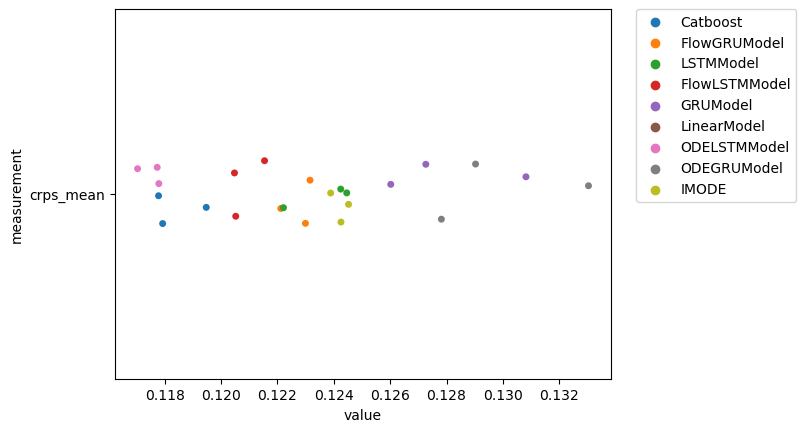

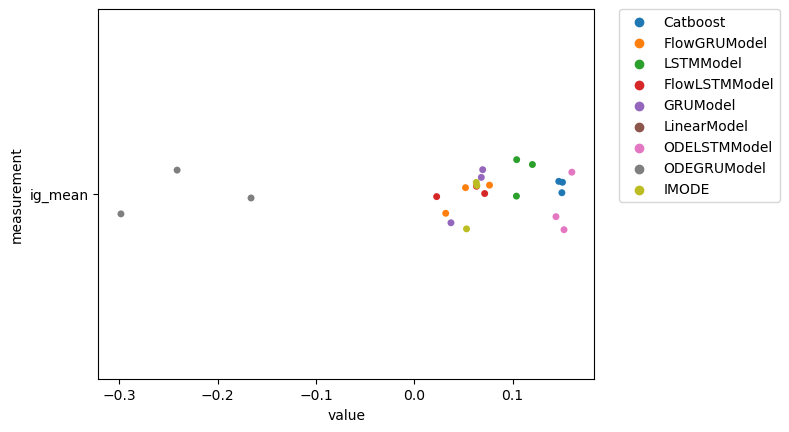

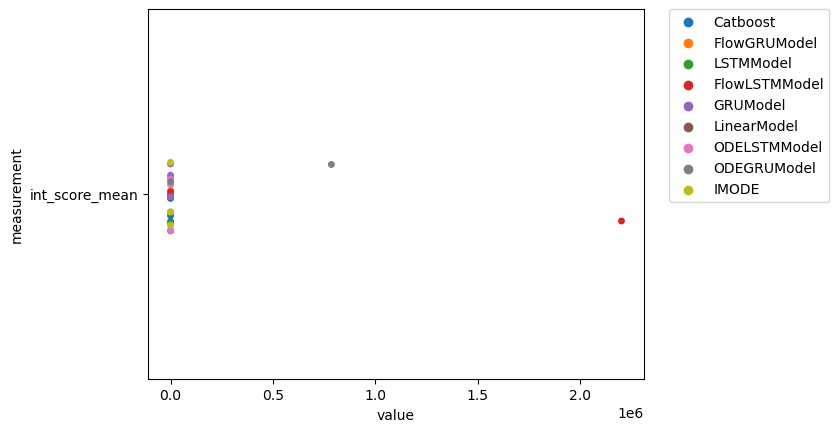

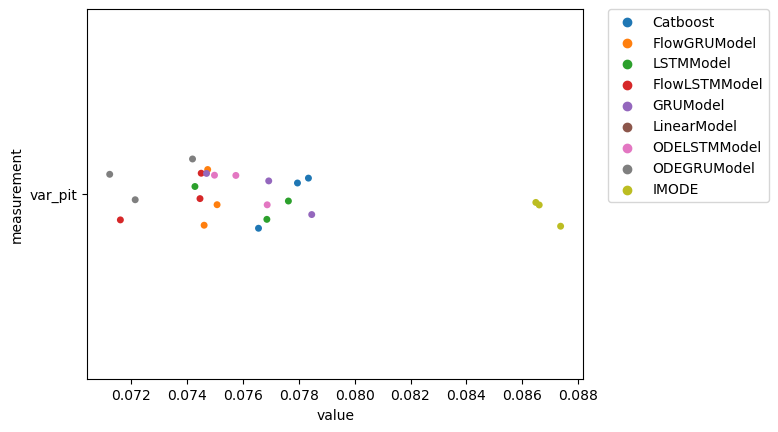

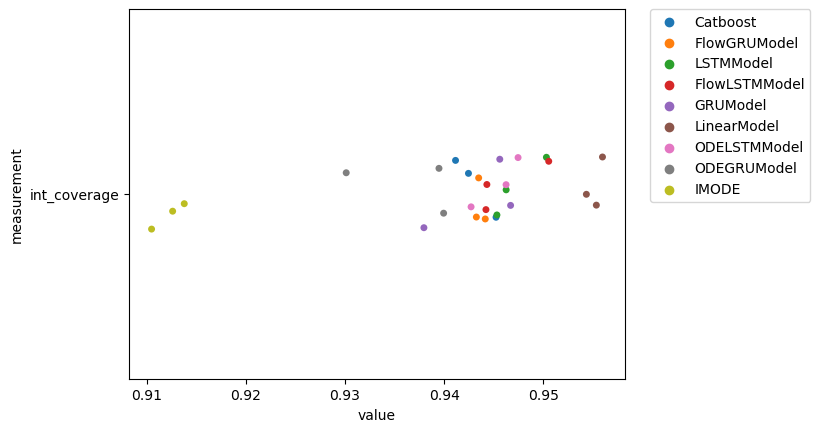

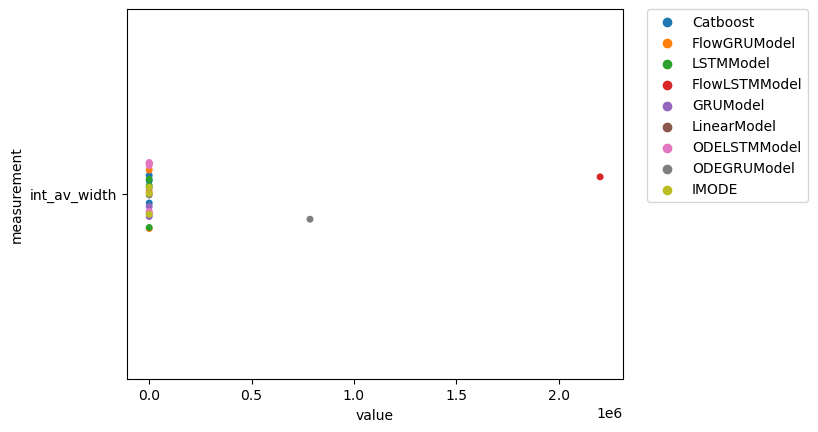

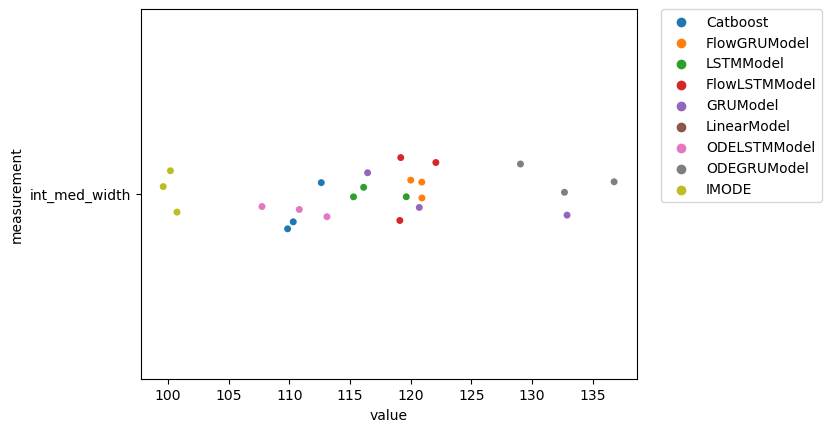

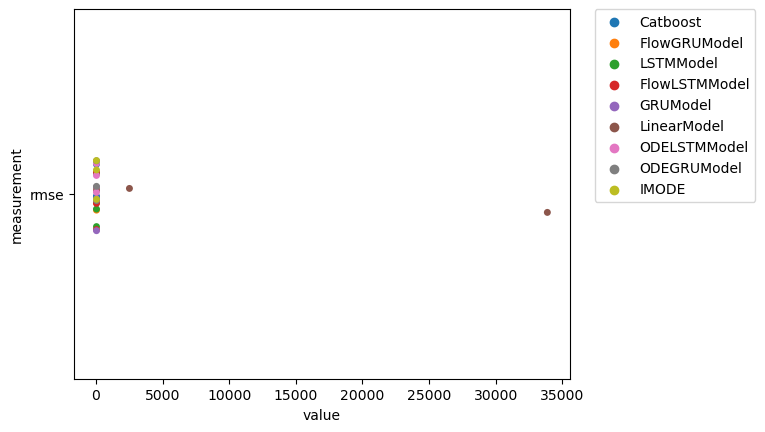

In [16]:
# Initialize the figure
for measure in list(df_results_long.measurement.unique()):
    f, ax = plt.subplots()
    sns.stripplot(x="value", y="measurement", hue="model",
                  data=df_results_long.loc[df_results_long.measurement.isin([measure])])
    #handles, labels = ax.get_legend_handles_labels()
    #ax.legend(loc="lower")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()